# OLS : Ordinary Linear Least Square

### 5개의 (xi, yi) 점을 나타내는 데이터프레임 정의

In [2]:
import pandas as pd

data = {'x': [1., 2., 3., 4., 5.], 'y':[1., 3., 4., 6., 5.]}
df = pd.DataFrame(data)
df

,x,y
0,1.0,1.0
1,2.0,3.0
2,3.0,4.0
3,4.0,6.0
4,5.0,5.0


### 가설 설정
- 5개의 점을 대표하는 직선을 나타내기 위해 ols 이용

In [5]:
import statsmodels.formula.api as smf

lm_model = smf.ols(formula='y~x', data=df).fit()
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

### seaborn 이용한 시각화 plot

In [6]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

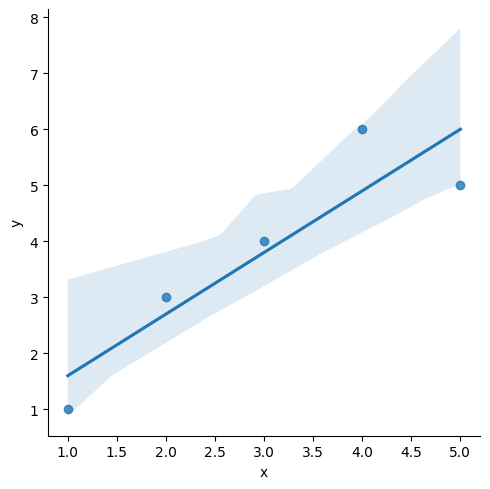

In [7]:
sns.lmplot(x='x', y='y', data=df)

---

# 잔차 residual
- 실제 값과 직선과의 차이 == 오차를 의미한다

In [8]:
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

### 결정계수 R-squred

![nn](img/r_squre.png)

### R-squred = ssR / ssT
- 녹색 선: 실제 값들의 평균

- ssE = 예측값과 실제값의 차이
- ssR = 예측값과 평균의 차이

- ssT = ssE + ssR

In [11]:
import numpy as np

# 실제 값들의 평균
mu = np.mean(df.y)

# 실제 y
y = df.y

# 예측 y_hat
y_hat = lm_model.predict()

# 수식 표현
np.sum((y_hat-mu)**2 / np.sum((y-mu)**2))

0.8175675675675678

### 라이브러리 사용하여 R-squared 구할 수 있음

In [14]:
lm_model.rsquared

0.8175675675675677

### 잔차 분포

C:\Users\User\AppData\Local\Temp\ipykernel_13612\1258040113.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid, color='black');


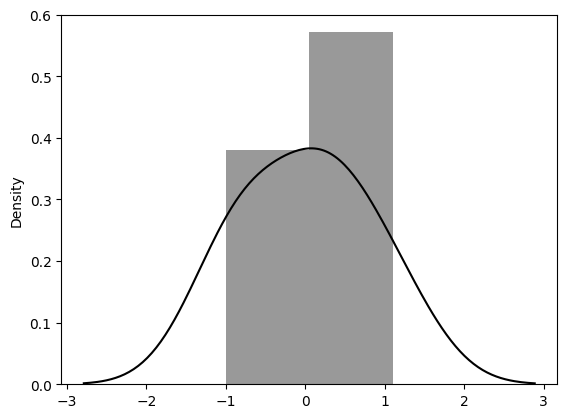

In [18]:
sns.distplot(resid, color='black');